## **Loading the Dataset**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

def roc_curve_plot(y_test, predicted):
  # Calculate the false positive rate (fpr) and true positive rate (tpr)
  y1 = [int(x) for x in y_test]
  p1 = [int(y) for y in predicted]
  fpr, tpr, thresholds = roc_curve(y1, p1)

  # Calculate the Area Under the ROC Curve (AUC)
  auc = roc_auc_score(y1, p1)

  plt.rc('font', size=8)
  # Plot the ROC curve
  plt.figure(figsize=(3,3))
  plt.plot(fpr, tpr, label='ROC')
  plt.plot([0, 1], [0, 1], 'k--', label='Random')
  plt.xlabel('False Positive Rate', fontsize=7)
  plt.ylabel('True Positive Rate', fontsize=7)
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()
  print("Area under the curve:", auc)

def pr_curve_plot(y_test, predicted):
  # Calculate precision and recall

  y1 = [int(x) for x in y_test]
  p1 = [int(y) for y in predicted]
  precision, recall, _ = precision_recall_curve(y1, p1)

  # Calculate average precision
  average_precision = average_precision_score(y1, p1)
  # Plot the Precision-Recall curve
  plt.figure(figsize=(3,3))
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall', fontsize=7)
  plt.ylabel('Precision', fontsize=7)
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision), fontsize=10)
  plt.show()

In [39]:
df = pd.read_csv('./Bank Customer Churn Prediction.csv', sep = ',', names=["customer id","credit score","country","gender","age","tenure","balance","products number","credit card","active member","estimated salary","churn"])
df = df.drop(0)

In [40]:
df

,customer id,credit score,country,gender,age,tenure,balance,products number,credit card,active member,estimated salary,churn
1,15634602,619,France,Female,42,2,0,1,1,1,101348.88,1
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
4,15701354,699,France,Female,39,1,0,2,0,0,93826.63,0
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,France,Male,39,5,0,2,1,0,96270.64,0
9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,709,France,Female,36,7,0,1,0,1,42085.58,1
9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **Data Exploration**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer id       10000 non-null  object
 1   credit score      10000 non-null  object
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  object
 5   tenure            10000 non-null  object
 6   balance           10000 non-null  object
 7   products number   10000 non-null  object
 8   credit card       10000 non-null  object
 9   active member     10000 non-null  object
 10  estimated salary  10000 non-null  object
 11  churn             10000 non-null  object
dtypes: object(12)
memory usage: 937.6+ KB


In [42]:
df.describe()

,customer id,credit score,country,gender,age,tenure,balance,products number,credit card,active member,estimated salary,churn
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,460,3,2,70,11,6382,4,2,2,9999,2
top,15634602,850,France,Male,37,2,0,1,1,1,24924.92,0
freq,1,233,5014,5457,478,1048,3617,5084,7055,5151,2,7963


Check for missing values for each column

In [43]:
df.isnull().sum()

customer id         0
credit score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products number     0
credit card         0
active member       0
estimated salary    0
churn               0
dtype: int64

Check for unique values for each column

In [44]:
df.nunique()

customer id         10000
credit score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products number         4
credit card             2
active member           2
estimated salary     9999
churn                   2
dtype: int64

Count and display the number of examples for each class of the labels

In [45]:
df['churn'].value_counts()


0    7963
1    2037
Name: churn, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

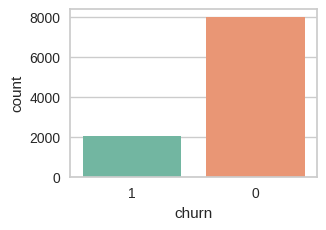

In [46]:
plt.figure(figsize = (7,10))

plt.subplot(4,2,1)
sns.countplot(x = 'churn', palette='Set2', data = df)

## **Data Balancing**

In [47]:
df = df.drop('customer id', 1)

<ipython-input-47-2cabeea8fe26>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('customer id', 1)


In [48]:
X = df.iloc[:, 0:10].values

y = df.iloc[:, 10].values

##**Data oversampling**

Data oversampling using Random Over Sampler Algorithm

In [49]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

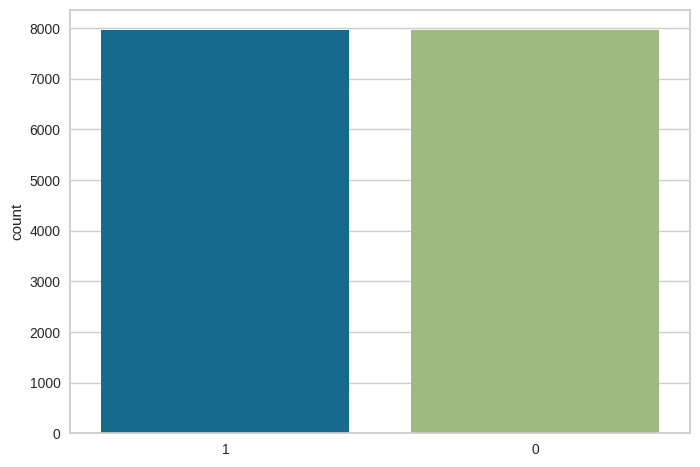

In [50]:
ax = sns.countplot(x=y)

Label Encoder transforms categorical variables into continuous variables


In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()

X[:,1] = label_encoder_country.fit_transform(X[:,1])
X[:,2] = label_encoder_gender.fit_transform(X[:,2])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Gaussian naive bayes**

In [53]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

Evaluation on training set

In [54]:
from sklearn import metrics

acc_train = naive_bayes.score(X_train, y_train)
acc_test = naive_bayes.score(X_test, y_test)
print("Accuracy on the training set:",acc_train)
print("Accuracy on the test set:",acc_test)

Accuracy on the training set: 0.6924646781789638
Accuracy on the test set: 0.689579409918393


Evalutation on test set

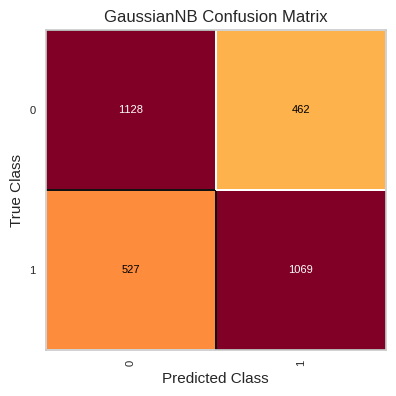

In [55]:
predicted = naive_bayes.predict(X_test)
confus_m = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(4,4))

cm = ConfusionMatrix(naive_bayes, cmap='YlOrRd')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show();

In [56]:
classification_naive_gaussian = (classification_report(y_test, predicted))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1590
           1       0.70      0.67      0.68      1596

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186



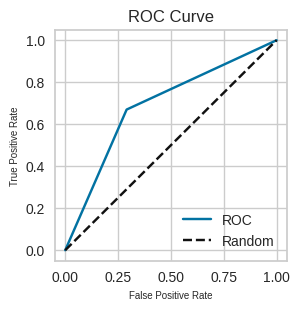

Area under the curve: 0.6896167305055091


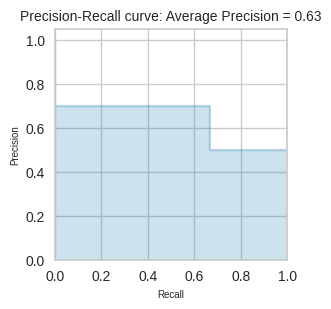

In [57]:
roc_curve_plot(y_test, predicted)
pr_curve_plot(y_test, predicted)

## **K-NN**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(metric = 'minkowski', p = 2)

k_list = list(range(1,501, 10))
k_values = dict(n_neighbors = k_list)

grid = GridSearchCV(knn, k_values, cv = 100, scoring = 'f1_macro')
grid.fit(X_train, y_train)

print( grid.best_params_, grid.best_score_ )

{'n_neighbors': 1} 0.8665586390444239


In [59]:
acc_train = grid.score(X_train, y_train)
acc_test = grid.score(X_test, y_test)
print("Accuracy on the training set:",acc_train)
print("Accuracy on the test set:",acc_test)

Accuracy on the training set: 1.0
Accuracy on the test set: 0.870342275957858


              precision    recall  f1-score   support

           0       0.96      0.77      0.86      1590
           1       0.81      0.97      0.88      1596

    accuracy                           0.87      3186
   macro avg       0.89      0.87      0.87      3186
weighted avg       0.89      0.87      0.87      3186



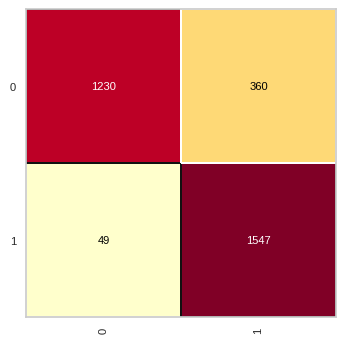

In [60]:
knn = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'], metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

fig, ax = plt.subplots(figsize=(4,4))

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

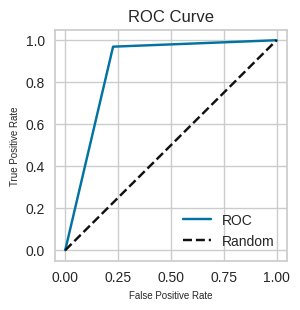

Area under the curve: 0.8714415756372064


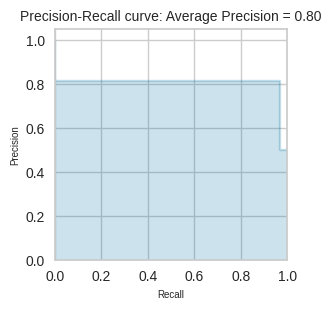

In [61]:
roc_curve_plot(y_test, previsoes)
pr_curve_plot(y_test, previsoes)

## **Decision Tree**

In [62]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="gini")
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred = tree.predict(X_test)

acc_train = tree.score(X_train, y_train)
acc_test = tree.score(X_test, y_test)
print("Accuracy on the training set:",acc_train)
print("Accuracy on the test set:",acc_test)

decision_tree_report = (classification_report(y_test, y_pred))
print(decision_tree_report)

Accuracy on the training set: 1.0
Accuracy on the test set: 0.903954802259887
              precision    recall  f1-score   support

           0       0.99      0.82      0.89      1590
           1       0.85      0.99      0.91      1596

    accuracy                           0.90      3186
   macro avg       0.92      0.90      0.90      3186
weighted avg       0.92      0.90      0.90      3186



0.903954802259887

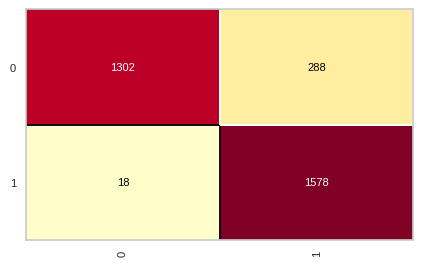

In [63]:
fig, ax = plt.subplots(figsize=(5,3))

cm = ConfusionMatrix(tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

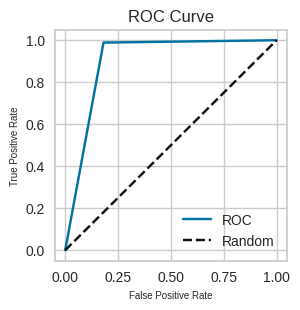

Area under the curve: 0.9037948645197901


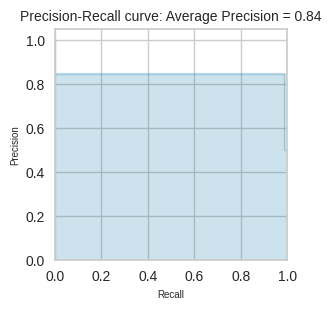

In [64]:
roc_curve_plot(y_test, y_pred)
pr_curve_plot(y_test, y_pred)

## **Random Forest**

In [65]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_space={'max_depth':[3,5,10,90],
              'n_estimators':[10,50,70],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,3,4]
           }

rf= RandomForestClassifier(random_state=44)

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')

grid_result = grid.fit(X_train, y_train)

In [66]:
grid_result.best_estimator_

RandomForestClassifier(max_depth=90, max_features=1, n_estimators=70,
                       random_state=44)

In [67]:
rf_best = grid_result.best_estimator_

In [68]:
predicted= rf_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1590
           1       0.93      0.99      0.96      1596

    accuracy                           0.96      3186
   macro avg       0.96      0.96      0.96      3186
weighted avg       0.96      0.96      0.96      3186



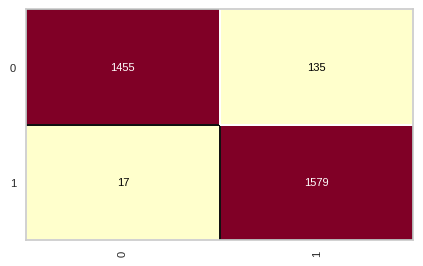

In [69]:
from sklearn import metrics

fig, ax = plt.subplots(figsize=(5,3))

cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

print(metrics.classification_report(y_test, predicted, digits=2))

In [70]:
acc_train = grid.score(X_train, y_train)
acc_test = grid.score(X_test, y_test)
print("Accuracy on the training set:",acc_train)
print("Accuracy on the test set:",acc_test)

Accuracy on the training set: 1.0
Accuracy on the test set: 0.9585687382297552


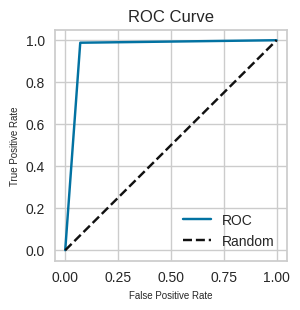

Area under the curve: 0.9585130278526505


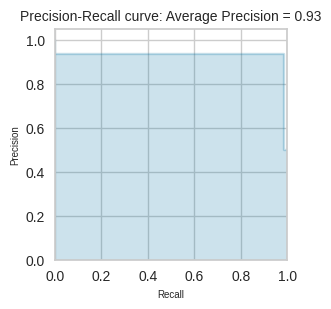

In [71]:
roc_curve_plot(y_test, predicted)
pr_curve_plot(y_test, predicted)

###**Feature Importance**

In [72]:
feature_imp = pd.Series(rf.feature_importances_,index = df.loc[:, df.columns != 'churn'].columns).sort_values(ascending=False)
feature_imp

age                 0.253092
products number     0.140930
balance             0.140884
estimated salary    0.138770
credit score        0.134042
tenure              0.079056
country             0.040719
active member       0.035252
gender              0.019221
credit card         0.018034
dtype: float64

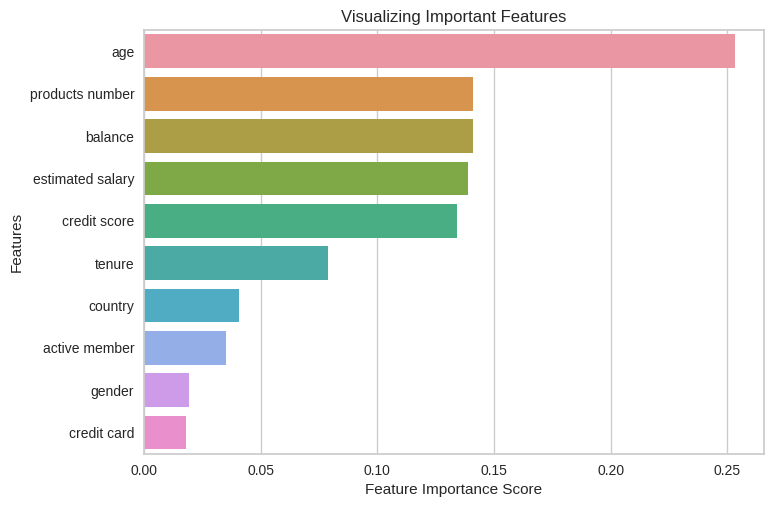

In [73]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# **XGBoost**

In [74]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

y_train1 = [int(x) for x in y_train]
xgb.fit(X_train, y_train1)
predicted = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy on the test set: 0.8920276208411801
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1590
           1       0.86      0.94      0.90      1596

    accuracy                           0.89      3186
   macro avg       0.90      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



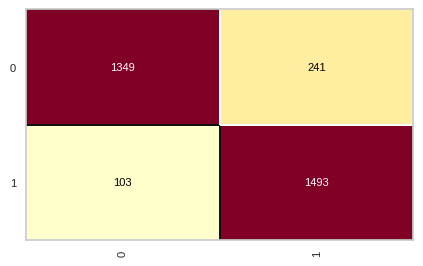

In [75]:
from sklearn import metrics

y_test1 = [int(x) for x in y_test]
predicted = [int(x) for x in predicted]

fig, ax = plt.subplots(figsize=(5,3))


cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test1)

acc = metrics.accuracy_score(y_test1, predicted)
precision = metrics.precision_score(y_test1, predicted, average='macro')
recall = metrics.recall_score(y_test1, predicted, average='macro')
fm = metrics.f1_score(y_test1, predicted, average='macro')

print("Accuracy on the test set:", acc)

print(metrics.classification_report(y_test1, predicted, digits=2))

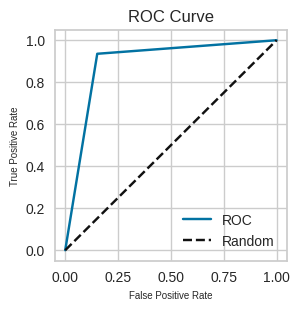

Area under the curve: 0.8919456660519223


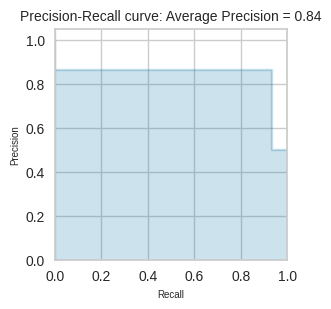

In [76]:
roc_curve_plot(y_test, predicted)
pr_curve_plot(y_test, predicted)

#**Stacking Classifier**

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

estimators = [
    ("rf", RandomForestClassifier(n_estimators=30, random_state=42)),
   ("xgb", make_pipeline(StandardScaler(), XGBClassifier(random_state=42))),
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [78]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.9639045825486503

In [79]:
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)
print("Accuracy on the training set:",acc_train)
print("Accuracy on the test set:",acc_test)



Accuracy on the training set: 0.9992935635792779
Accuracy on the test set: 0.9639045825486503


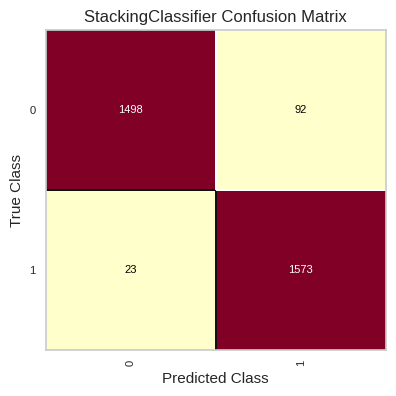

<Axes: title={'center': 'StackingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [80]:
predicted = clf.predict(X_test)
confus_m_clf = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(4,4))  # Adjust width and height as desired

cm_clf = ConfusionMatrix(clf, cmap='YlOrRd')
cm_clf.fit(X_train, y_train)
cm_clf.score(X_test, y_test)

cm_clf.show()

In [81]:
classification_clf = (classification_report(y_test, predicted))
print(classification_clf)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1590
           1       0.94      0.99      0.96      1596

    accuracy                           0.96      3186
   macro avg       0.96      0.96      0.96      3186
weighted avg       0.96      0.96      0.96      3186



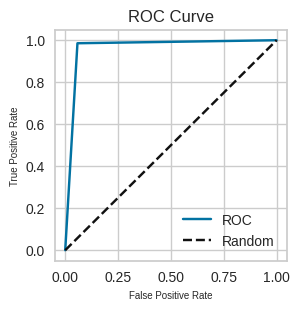

Area under the curve: 0.963863668605476


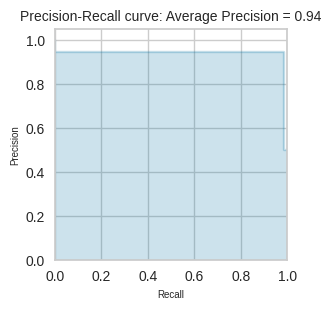

In [82]:
roc_curve_plot(y_test, predicted)
pr_curve_plot(y_test, predicted)